In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D,
                                     Dropout, Flatten, BatchNormalization)
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN
x_train_cnn = x_train.reshape(-1,28,28,1)
x_test_cnn = x_test.reshape(-1,28,28,1)

# One-hot encoding
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def create_cnn(optimizer):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
cnn_model = create_cnn(Adam())
history_cnn = cnn_model.fit(
    x_train_cnn, y_train_cat,
    epochs=10,
    validation_data=(x_test_cnn, y_test_cat)
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 171s 90ms/step - accuracy: 0.9229 - loss: 0.2483 - val_accuracy: 0.9858 - val_loss: 0.0453
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 166s 89ms/step - accuracy: 0.9874 - loss: 0.0396 - val_accuracy: 0.9894 - val_loss: 0.0366
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 172s 91ms/step - accuracy: 0.9910 - loss: 0.0256 - val_accuracy: 0.9877 - val_loss: 0.0406
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 203s 92ms/step - accuracy: 0.9937 - loss: 0.0180 - val_accuracy: 0.9900 - val_loss: 0.0330
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 170s 90ms/step - accuracy: 0.9955 - loss: 0.0139 - val_accuracy: 0.9905 - val_loss: 0.0316
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 199s 89ms/step - accuracy: 0.9960 - loss: 0.0118 - val_accuracy: 0.9902 - val_loss: 0.0328
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 89ms/step - accuracy: 0.9976 - loss: 0.0076 - val_accuracy: 0.9909 - val_loss: 0.0337
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 89ms/step - accuracy: 

In [ ]:
def create_mlp(layers, optimizer):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))

    for neurons in layers:
        model.add(Dense(neurons))
        model.add(BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))

    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
mlp1 = create_mlp([512,256,128], SGD(learning_rate=0.01))
mlp1.fit(x_train, y_train_cat, epochs=20, validation_data=(x_test, y_test_cat))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8298 - loss: 0.6093 - val_accuracy: 0.9615 - val_loss: 0.1443
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9523 - loss: 0.1723 - val_accuracy: 0.9718 - val_loss: 0.1032
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9691 - loss: 0.1139 - val_accuracy: 0.9735 - val_loss: 0.0875
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9738 - loss: 0.0899 - val_accuracy: 0.9772 - val_loss: 0.0794
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9807 - loss: 0.0699 - val_accuracy: 0.9777 - val_loss: 0.0740
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9847 - loss: 0.0560 - val_accuracy: 0.9788 - val_loss: 0.0702
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9870 - loss: 0.0481 - val_accuracy: 0.9800 - val_loss: 0.0657
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9895 - loss: 0

In [ ]:
mlp2 = create_mlp([256], Adam())
mlp2.fit(x_train, y_train_cat, epochs=15, validation_data=(x_test, y_test_cat))


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9020 - loss: 0.3326 - val_accuracy: 0.9670 - val_loss: 0.1096
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9654 - loss: 0.1155 - val_accuracy: 0.9734 - val_loss: 0.0879
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9755 - loss: 0.0811 - val_accuracy: 0.9702 - val_loss: 0.0928
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9817 - loss: 0.0596 - val_accuracy: 0.9770 - val_loss: 0.0729
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9852 - loss: 0.0488 - val_accuracy: 0.9776 - val_loss: 0.0742
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9872 - loss: 0.0409 - val_accuracy: 0.9796 - val_loss: 0.0665
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9903 - loss: 0.0315 - val_accuracy: 0.9676 - val_loss: 0.1037
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9914 - loss: 0.0

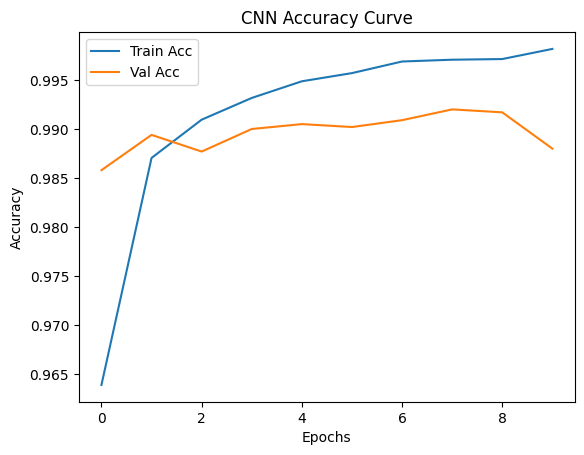

In [ ]:
plt.plot(history_cnn.history['accuracy'], label='Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("CNN Accuracy Curve")
plt.show()
